In [1]:
import pandas as pd
df=pd.read_csv("/content/sample_data/women_clothing_ecommerce_sales.csv")
# Inspect dataframe's basic information
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [2]:
df.describe()


,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [13]:
# Preview first few rows
df.head()


,order_id,order_date,sku,color,size,unit_price,quantity,revenue,month,dayofweek
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,2022-06,2
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,2022-06,2
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,2022-06,4
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,2022-06,5
5,5,2022-06-11 14:46:00,799,Dark Blue,XL,264,1,264,2022-06,5


In [15]:
# Check for missing values
print(df.isnull().sum())

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
month         0
dayofweek     0
dtype: int64


In [12]:
#treating the missing values as one size (info gotten on kaggle)
df['size'] = df['size'].fillna('One Size')
print(df.isnull().sum())

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
month         0
dayofweek     0
dtype: int64


In [16]:
# Find non-numeric SKUs
non_numeric_skus = df[~df['sku'].str.isnumeric()]
print(non_numeric_skus)

Empty DataFrame
Columns: [order_id, order_date, sku, color, size, unit_price, quantity, revenue, month, dayofweek]
Index: []


In [17]:
# To Filter out non-numeric SKUs if not valid
df = df[df['sku'].str.isnumeric()]
#To ensure correct data types
print(df.dtypes)

order_id               int64
order_date    datetime64[ns]
sku                   object
color                 object
size                  object
unit_price             int64
quantity               int64
revenue                int64
month              period[M]
dayofweek              int32
dtype: object


In [18]:
# Best and Worst-Selling SKUs Overall
best_selling_sku_overall = df.groupby('sku')['quantity'].sum().idxmax()
print(f"Best-selling SKU overall: {best_selling_sku_overall}")
worst_selling_sku_overall = df.groupby('sku')['quantity'].sum().idxmin()
print(f"Worst-selling SKU overall: {worst_selling_sku_overall}")

# Best and Worst-Selling SKUs by Color
best_selling_by_color = df.groupby(['sku', 'color'])['quantity'].sum().reset_index().sort_values(by=['quantity'], ascending=False)
print("\nBest-selling SKUs by color:")
print(best_selling_by_color.head(5))  # Show top 5

worst_selling_by_color = df.groupby(['sku', 'color'])['quantity'].sum().reset_index().sort_values(by=['quantity'], ascending=True)
print("\nWorst-selling SKUs by color:")
print(worst_selling_by_color.head(5))  # Show top 5

# Best and Worst-Selling SKUs by Size
best_selling_by_size = df.groupby(['sku', 'size'])['quantity'].sum().reset_index().sort_values(by=['quantity'], ascending=False)
print("\nBest-selling SKUs by size:")
print(best_selling_by_size.head(5))  # Show top 5

worst_selling_by_size = df.groupby(['sku', 'size'])['quantity'].sum().reset_index().sort_values(by=['quantity'], ascending=True)
print("\nWorst-selling SKUs by size:")
print(worst_selling_by_size.head(5))  # Show top 5

Best-selling SKU overall: 799
Worst-selling SKU overall: 29

Best-selling SKUs by color:
     sku       color  quantity
47   799   Dark Blue       287
40   708   Dark Blue        99
46    79  Light Blue         9
34  3799   Grey Wash         9
49    89   Dark Blue         9

Worst-selling SKUs by color:
    sku       color  quantity
0   127   Dark Wash         1
1   127  Light Wash         1
2   127    Mid Wash         1
3  1499   Dark Blue         1
4  1499  Light Blue         1

Best-selling SKUs by size:
    sku size  quantity
34  799   XL       123
32  799    L        84
33  799    M        80
21  708  2XL        37
22  708  3XL        33

Worst-selling SKUs by size:
     sku size  quantity
3    218    L         1
10    29    S         1
13  3799    L         1
31    79   XL         1
27    79  3XL         1


month
2022-06     90
2022-07    114
2022-08    147
2022-09    160
Freq: M, Name: order_date, dtype: int64


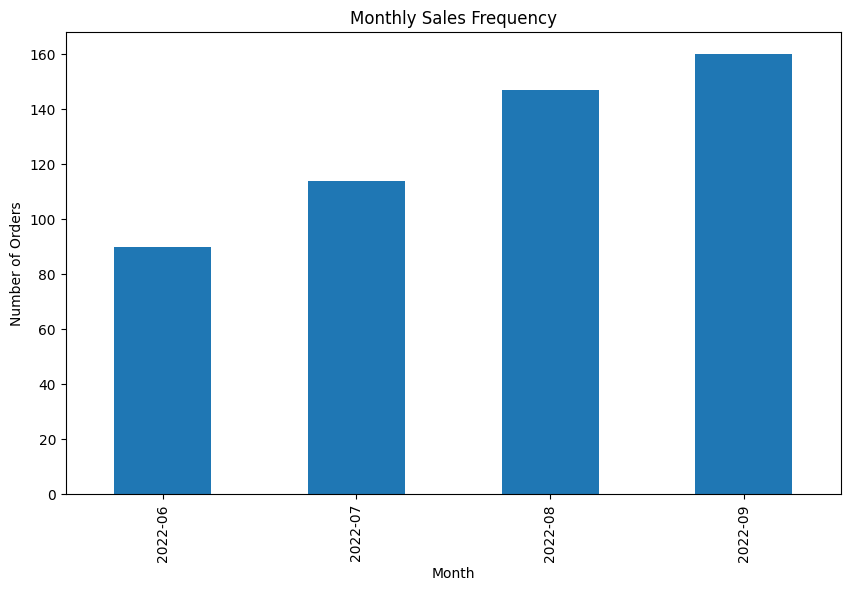

In [19]:
#Analyze Purchase Frequency and Identify Peak Periods
#Group by dateintervals to analyze trends.
# Analyze frequency of purchases
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.to_period('M')

# Group by month to analyze trends
monthly_sales = df.groupby('month')['order_date'].count()
print(monthly_sales)

# Plot purchase frequency
import matplotlib.pyplot as plt
monthly_sales.plot(kind='bar', figsize=(10, 6), title='Monthly Sales Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

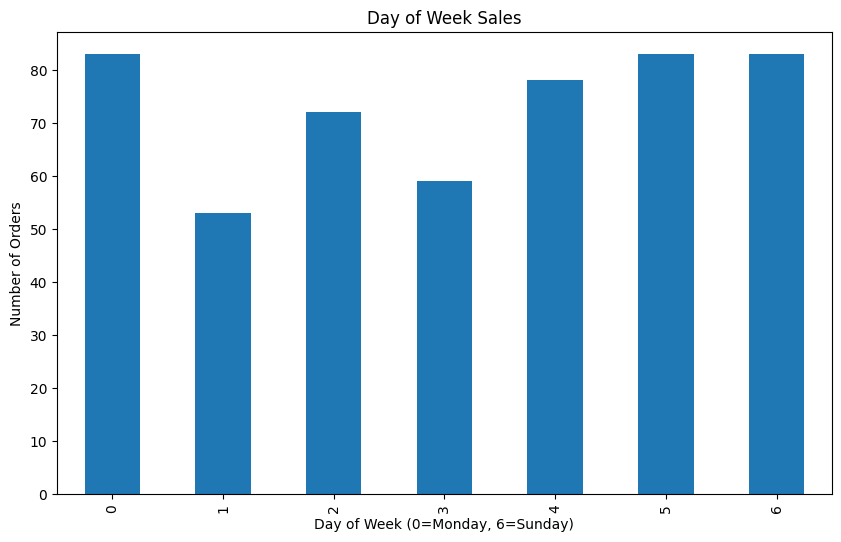

dayofweek
0    83
1    53
2    72
3    59
4    78
5    83
6    83
Name: order_date, dtype: int64


In [20]:
# Extract day of the week from 'order_date' and create a new column
df['dayofweek'] = df['order_date'].dt.dayofweek
# Group by day of the week to analyze daily trends
dayofweek_sales = df.groupby('dayofweek')['order_date'].count()
# Create a plot for day of week sales
plt.figure(figsize=(10, 6))
dayofweek_sales.plot(kind='bar', title='Day of Week Sales')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.show()
print(dayofweek_sales)


In [21]:
#Identify Revenue-Generating Products
# calculating revenue for each transaction.
df['revenue'] = df['quantity'] * df['unit_price']
product_revenue = df.groupby('sku')['revenue'].sum().reset_index()
print(product_revenue)
# Sort the revenue in descending order
product_revenue = product_revenue.sort_values(by=['revenue'], ascending=False)
print(product_revenue.head(5))  # Display the top 5 products

      sku  revenue
0     127      714
1    1499      574
2    1719     2052
3     218     2204
4     229      414
5     239     4199
6    2499      962
7      29      227
8    3081      990
9     339     1084
10   3799     2390
11    439      258
12    539      536
13  61399     1112
14    628      268
15    708    29146
16     77     4055
17     79     2817
18    799    79182
19   8499      699
20     89     3341
21    897      804
22   9699     4896
     sku  revenue
18   799    79182
15   708    29146
22  9699     4896
5    239     4199
16    77     4055


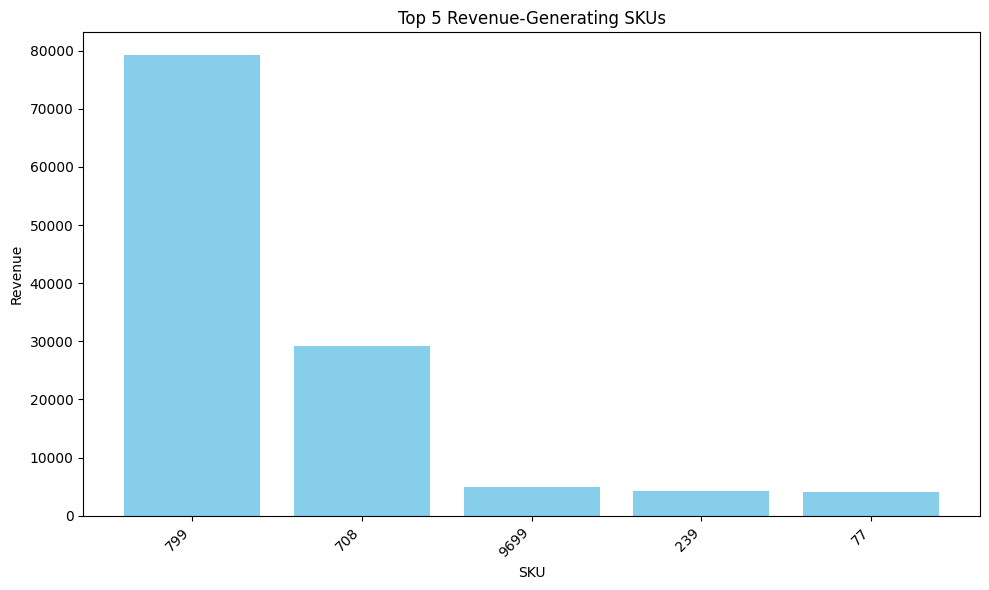

In [22]:
import matplotlib.pyplot as plt
# Plot top 5 SKUs by revenue
top_products = product_revenue.sort_values(by=['revenue'], ascending=False).head(5) # Added by=['revenue'] to specify column for sorting


# Reset index to ensure it's usable for plotting
top_products = top_products.reset_index()

# Use SKUs as x-axis labels
plt.figure(figsize=(10, 6))
# Access SKU column using its name instead of index
plt.bar(top_products['sku'], top_products['revenue'], color='skyblue')

plt.title('Top 5 Revenue-Generating SKUs')
plt.xlabel('SKU')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Aggregate data by product
popular_products = df.groupby('sku').agg({
    'quantity': 'sum',  # Total units sold
    'revenue': 'sum'    # Total revenue
}).sort_values(by='quantity', ascending=False)

#Recommend top  products
top_products = popular_products.head(5)  # Top 5 popular products

print("Top 5 Popular Products:")
print(top_products)



Top 5 Popular Products:
      quantity  revenue
sku                    
799        287    79182
708         99    29146
9699        17     4896
77          16     4055
239         16     4199


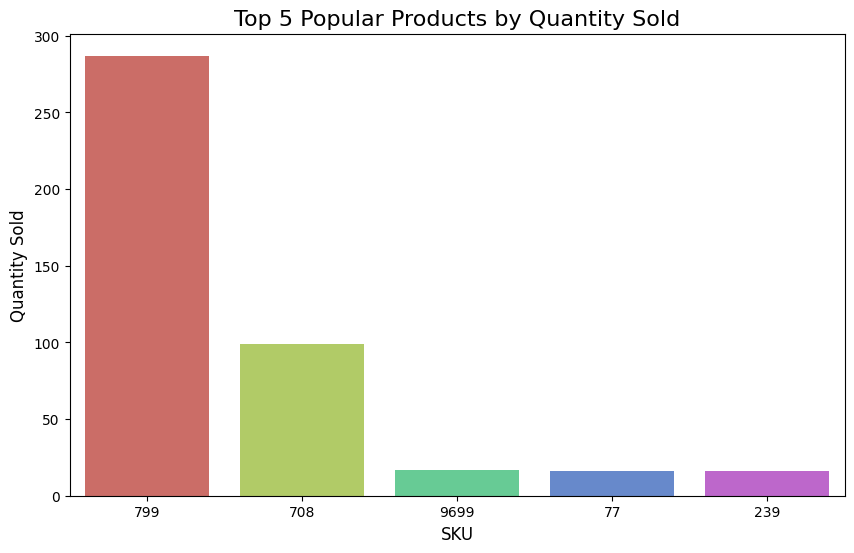

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
top_products = top_products.reset_index()  # Reset index for easier plotting
# Add a 'category' column
# Assuming 'sku' represents the product category for this visualization
top_products['category'] = top_products['sku']
# Plot the bar chart
plt.figure(figsize=(10, 6))

# 'hls' provides distinct colors
sns.barplot(x="category", y="quantity", data=top_products, hue="category", palette="hls", legend=False)
# Customize the chart
#Customize the chart
plt.title('Top 5 Popular Products by Quantity Sold', fontsize=16)
plt.xlabel('SKU', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Show the plot
plt.show()